In [73]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import random

In [74]:
# xs=np.array([1,2,3,4,5,6], dtype=np.float64)
# ys=np.array([5,4,6,5,6,7], dtype=np.float64)

In [75]:
def create_data(hm, variance,step=2, correlation=False):
    val=1
    ys=[]
    for i in range(hm):
        y=val + random.randrange(-variance, variance)
        ys.append(y)
        
        if correlation and correlation=='pos':
            val+=step
        elif correlation and correlation=='neg':
            val-=step
    xs=[i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)      
        
    

In [76]:
def best_fit_slope_and_intercept(xs, ys):
    m=((mean(xs)*mean(ys)) - (mean(xs*ys)))/(((mean(xs))**2) - mean(xs**2))
    b=mean(ys) - m*mean(xs)
    
    return m, b
def squared_error(y_origin, y_line):
    return sum((y_line -y_origin)**2)
def coefficient_of_determination(y_origin, y_line):
    y_mean_line=[mean(y_origin) for y in y_origin]
    square_error_regression=squared_error(y_origin, y_line)
    square_error_y_mean=squared_error(y_origin, y_mean_line)
    return 1-(square_error_regression/square_error_y_mean)



In [77]:
xs, ys=create_data(40, 10,2, correlation='pos')

In [78]:
m, b=best_fit_slope_and_intercept(xs, ys)

In [79]:
m, b

(1.9601313320825515, 1.302439024390246)

In [80]:
regression_line=[m*x + b for x in xs ]

In [81]:
predict_x=9
predict_y=m*predict_x + b

In [82]:
r_squared=coefficient_of_determination(ys, regression_line)
r_squared

0.9448415480747052

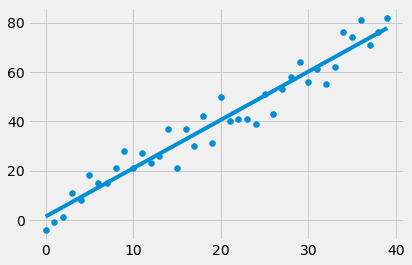

In [83]:
plt.scatter(xs,ys)
# plt.scatter(predict_x,predict_y, color='r')
plt.plot(xs, regression_line)
plt.show()